In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving all-data.csv to all-data.csv
User uploaded file "all-data.csv" with length 672006 bytes


In [2]:
#importing libraries
import nltk
nltk.download('stopwords')
import nltk
nltk.download('wordnet')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import keras
import random
from keras import models
from keras import layers

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


Using TensorFlow backend.


### **Importing Dataset**

In [3]:
df=pd.read_csv("all-data.csv", encoding='latin-1', header=None)
df.columns=["Sentiment","News Headlines"]
df.head()
#(4846, 2)

,Sentiment,News Headlines
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sentiment       4846 non-null   object
 1   News Headlines  4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [5]:
df.describe()

,Sentiment,News Headlines
count,4846,4846
unique,3,4838
top,neutral,SSH Communications Security Corporation is hea...
freq,2879,2


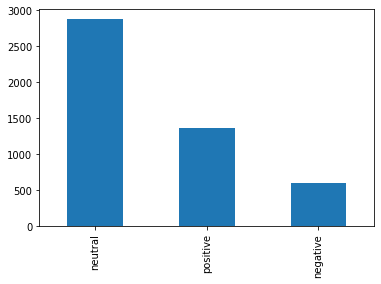

In [6]:
df.Sentiment.value_counts().plot(kind="bar")

In [0]:
X=df["News Headlines"]
y=df["Sentiment"]

### **Text Preprocessing**

In [0]:
#remove numbers, remove units and percentage signs

def text_cleaning(text):

  text=re.sub(r"[^a-zA-Z]"," ",text.lower())
  text=re.sub(r" ml?n? "," ",text)
  text=re.sub(r" eur[0-9]? "," ",text)
  text=re.sub(r'\s+', ' ', text)

  return text
X=X.apply(lambda z:text_cleaning(z) )  


#Lemmatization
lemmatizer=WordNetLemmatizer()
def lematizing(text):
  lem_text=[lemmatizer.lemmatize(i) for i in text.split()]
  return lem_text
X=  X.apply(lambda z : lematizing(z))


#Removing stop words 
stop = stopwords.words('english')
X = X.apply(lambda x: [item for item in x if item not in stop])




In [0]:
X=X.apply(lambda x: " ".join(x) ) 

In [12]:
X.values[:5]

array(['according gran company ha plan move production russia although company growing',
       'technopolis plan develop stage area le square meter order host company working computer technology telecommunication statement said',
       'international electronic industry company elcoteq ha laid ten employee tallinn facility contrary earlier layoff company contracted rank office worker daily postimees reported',
       'new production plant company would increase capacity meet expected increase demand would improve use raw material therefore increase production profitability',
       'according company updated strategy year basware target long term net sale growth range operating profit margin net sale'],
      dtype=object)

### **Importing GloVe in Colab**

In [13]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2020-05-18 19:50:29--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-05-18 19:50:29--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-05-18 19:50:29--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [14]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [15]:
!ls
!pwd

all-data.csv	   glove.6B.200d.txt  glove.6B.50d.txt	sample_data
glove.6B.100d.txt  glove.6B.300d.txt  glove.6B.zip
/content


In [0]:
embeddings_index = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

#(len(embeddings_index), shape=(400000,100))

In [17]:
embeddings_index.get("career")

array([ 5.5668e-01, -3.6349e-01, -2.7505e-02, -5.5693e-02,  4.3287e-01,
       -1.1270e-01,  5.1074e-01, -3.0207e-01, -9.6957e-01,  7.0382e-01,
        4.2608e-01, -6.1908e-01,  2.8802e-01, -6.2842e-02, -4.7391e-01,
        1.5677e-01,  9.0553e-01, -4.2574e-02,  9.6758e-02,  1.0923e+00,
       -5.4759e-02,  7.2411e-01,  6.5144e-02,  1.8919e-01,  9.4574e-01,
       -5.1552e-01, -4.9121e-01, -6.7578e-01,  4.4609e-01, -6.1729e-02,
       -1.2264e+00,  5.9508e-01, -5.8998e-02, -1.7081e-01, -7.6331e-01,
       -6.7477e-02, -1.5773e+00,  2.7413e-01, -1.0334e+00,  6.8594e-01,
        2.4986e-01, -4.1991e-02,  3.8075e-01, -2.7330e-01,  1.7265e-01,
       -1.3121e-01,  8.7280e-01, -1.1695e+00,  4.3998e-01, -7.3655e-01,
       -3.3621e-01, -8.0681e-01, -1.8578e-01,  1.3991e+00,  7.0109e-01,
       -2.5181e+00, -1.7721e-01, -1.1897e-01,  7.8810e-01,  1.6106e+00,
       -3.5249e-01,  7.2467e-01, -2.1828e-01,  1.0189e-01,  1.9432e-02,
        3.4907e-02,  8.6540e-01, -3.1430e-01, -1.4712e-01,  5.67

### **Creating Word Embeddings**

In [18]:
#tokenization
num_words=len(embeddings_index)

tk = Tokenizer(num_words=num_words, split=" ", lower=True)
tk.fit_on_texts(X)
X_seq = tk.texts_to_sequences(X)

#creating word to index dictionary 
word_index=tk.word_index
word_index["job"]

377

In [0]:
#finding max length of text
MAX_LEN=0
for i in range(len(X)):
  num=len(X[i].split())
  if num>MAX_LEN:
    MAX_LEN=num

#padding
X_seq_trunc = pad_sequences(X_seq, maxlen=MAX_LEN)    


In [0]:
#creating word embeddings (embed_matrix)
embed_dim=100
embed_matrix=np.zeros((num_words+1,embed_dim))


for word, i in word_index.items():
    if i >= num_words: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embed_matrix[i] = embedding_vector

#embed_matrix.shape - (400001, 100)
   

In [0]:
#creating categorical output
y_onehot=pd.get_dummies(y)


#X_seq_trunc.shape,y_onehot.shape - ((4846, 41), (4846, 3))

### **Train-Test Split**

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_seq_trunc, y_onehot, test_size=0.15, random_state=17)

In [23]:
random.seed(17)

model=models.Sequential()
model.add(layers.Embedding(num_words+1,embed_dim, embeddings_initializer=keras.initializers.constant(embed_matrix), input_length= MAX_LEN, trainable=False))
model.add(layers.LSTM(64, dropout=0.5, return_sequences=True))
model.add(layers.LSTM(64, dropout=0.5, return_sequences=False))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units =3 , activation="softmax"))

opt=keras.optimizers.Adam(lr=0.01)
model.compile(loss="categorical_crossentropy",optimizer=opt,metrics=["accuracy"])

history=model.fit(x_train,y_train,epochs=100,batch_size=256,validation_data=(x_test,y_test))



Train on 4119 samples, validate on 727 samples
Epoch 1/100
4119/4119 [==============================] - 6s 1ms/step - loss: 0.9355 - accuracy: 0.5815 - val_loss: 0.8156 - val_accuracy: 0.6589
Epoch 2/100
4119/4119 [==============================] - 4s 913us/step - loss: 0.8415 - accuracy: 0.6363 - val_loss: 0.7847 - val_accuracy: 0.6644
Epoch 3/100
4119/4119 [==============================] - 4s 908us/step - loss: 0.8127 - accuracy: 0.6332 - val_loss: 0.7524 - val_accuracy: 0.6726
Epoch 4/100
4119/4119 [==============================] - 3s 832us/step - loss: 0.7832 - accuracy: 0.6485 - val_loss: 0.7359 - val_accuracy: 0.6768
Epoch 5/100
4119/4119 [==============================] - 4s 859us/step - loss: 0.7652 - accuracy: 0.6511 - val_loss: 0.7267 - val_accuracy: 0.6850
Epoch 6/100
4119/4119 [==============================] - 4s 858us/step - loss: 0.7474 - accuracy: 0.6676 - val_loss: 0.6873 - val_accuracy: 0.6974
Epoch 7/100
4119/4119 [==============================] - 3s 836us/step - 

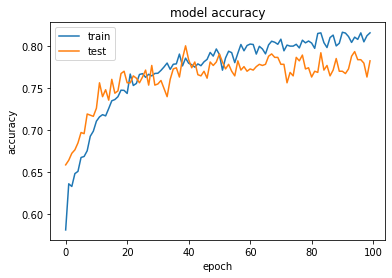

No handles with labels found to put in legend.


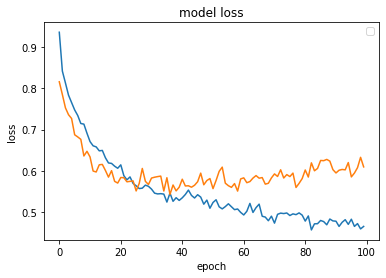

In [24]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

In [0]:
pred=model.predict(x_test)

prediction=pred
for i in range(len(prediction)):
  j= prediction[i].argmax()
  for k in range(3):
    if k==j:
      prediction[i][k]=1
    else:
      prediction[i][k]=0 

In [26]:
from sklearn.metrics import accuracy_score, mean_squared_error

print("Accuracy score = " + str(round(accuracy_score(y_test,prediction),2)))
print("Mean Square Error = " + str(round(mean_squared_error(y_test,prediction),2)))




Accuracy score = 0.78
Mean Square Error = 0.14
